Implement K-Means clustering on sales_data_sample.csv dataset. Determine the number of clusters
using the elbow method.
Dataset link :
https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings ('ignore')
from google.colab import files

In [2]:
uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample.csv


In [3]:
df = pd.read_csv("sales_data_sample.csv", encoding="latin")

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df = df[['ORDERLINENUMBER', 'SALES']]
df

,ORDERLINENUMBER,SALES
0,2,2871.00
1,5,2765.90
2,2,3884.34
3,6,3746.70
4,14,5205.27
...,...,...
2818,15,2244.40
2819,1,3978.51
2820,4,5417.57
2821,1,2116.16


In [6]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.values)

wcss = []

for i in range(1, 11):
  model = KMeans (n_clusters=i, init='k-means++', random_state=42)
  model.fit_predict(scaled_values)
  wcss.append(model.inertia_)
  print(wcss,i)

[5645.999999999997] 1
[5645.999999999997, 3598.6569030398573] 2
[5645.999999999997, 3598.6569030398573, 2087.4626650537434] 3
[5645.999999999997, 3598.6569030398573, 2087.4626650537434, 1710.1606421510683] 4
[5645.999999999997, 3598.6569030398573, 2087.4626650537434, 1710.1606421510683, 1406.7231945849453] 5
[5645.999999999997, 3598.6569030398573, 2087.4626650537434, 1710.1606421510683, 1406.7231945849453, 1174.4393966766195] 6
[5645.999999999997, 3598.6569030398573, 2087.4626650537434, 1710.1606421510683, 1406.7231945849453, 1174.4393966766195, 1016.7869352690234] 7
[5645.999999999997, 3598.6569030398573, 2087.4626650537434, 1710.1606421510683, 1406.7231945849453, 1174.4393966766195, 1016.7869352690234, 874.6357310729601] 8
[5645.999999999997, 3598.6569030398573, 2087.4626650537434, 1710.1606421510683, 1406.7231945849453, 1174.4393966766195, 1016.7869352690234, 874.6357310729601, 784.2450171736469] 9
[5645.999999999997, 3598.6569030398573, 2087.4626650537434, 1710.1606421510683, 1406.

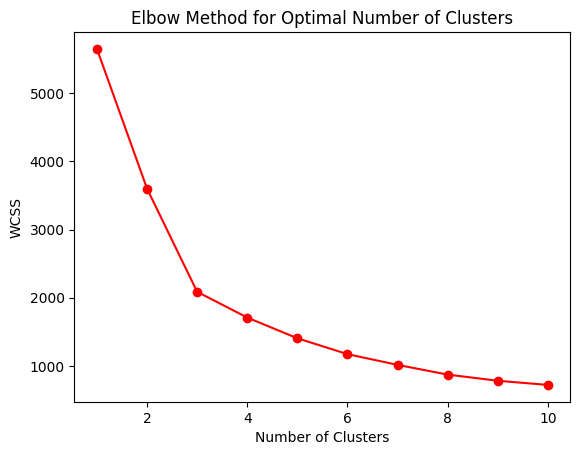

In [7]:
plt.plot(range (1, 11), wcss, 'ro-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
model = KMeans (n_clusters=3, init='k-means++')
clusters = model.fit_predict(scaled_values)
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_values, model.labels_)
print(score)
model.inertia_

0.4216942661973636


2088.1496921758003

In [9]:
df['cluster'] = clusters
df

,ORDERLINENUMBER,SALES,cluster
0,2,2871.00,0
1,5,2765.90,0
2,2,3884.34,0
3,6,3746.70,0
4,14,5205.27,1
...,...,...,...
2818,15,2244.40,1
2819,1,3978.51,0
2820,4,5417.57,2
2821,1,2116.16,0


In [10]:
model.inertia_

2088.1496921758003

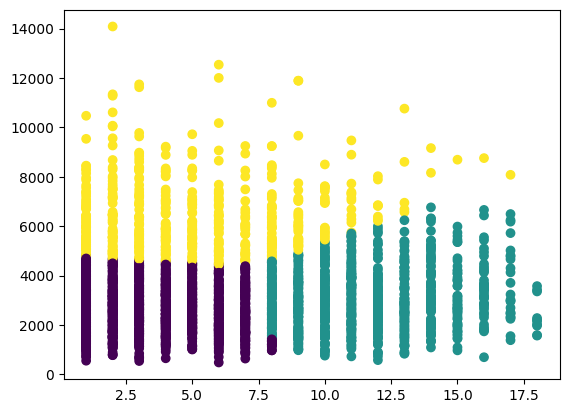

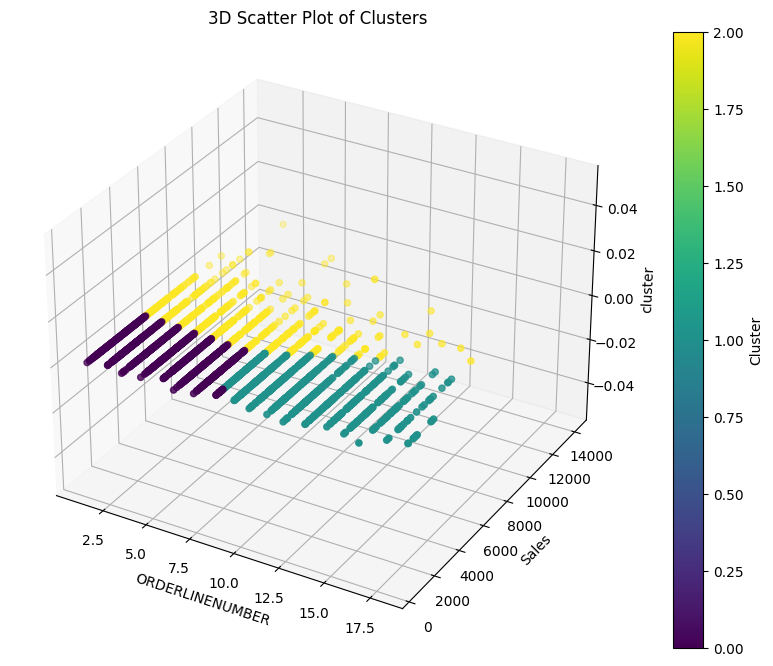

In [11]:
plt.scatter(df['ORDERLINENUMBER'], df['SALES'], c=df['cluster'])
plt.show()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax =  fig.add_subplot(111, projection='3d')
scatter = ax.scatter (df ['ORDERLINENUMBER'], df['SALES'], c=df['cluster'], cmap='viridis')
ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('ORDERLINENUMBER')
ax.set_ylabel('Sales')
ax.set_zlabel('cluster')
fig.colorbar (scatter, ax=ax, label='Cluster')
plt.show()